In [1]:
import pandas as pd
import re

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open("../data/merged_trump_and_master.csv",'r') as f:
    data = f.readlines()

In [3]:
data[0]

"(u'497118', [u'2016071300114003', u'P', u'1', u'TIHT COMMERCIAL LLC', u'C/O THE TRUMP ORGANIZATION', u'725 FIFTH AVENUE', u'US', u'NEW YORK', u'NY', u'10022', u'07/31/2016 12:00:00 AM', u'2017022101414001', u'A', u'2017000072573', u'1', u'ASST', u'12/03/2016', u'0', u'02/22/2017', u'02/22/2017', u'0', u'0', u'0', u'0', u'02/28/2017'])\n"

In [4]:
dates = []
amounts =[]
for line in data:
    dates.append(line.split('[')[1].split(']')[0].split(',')[-7].split('u')[1][1:-1])
    amounts.append(line.split('[')[1].split(']')[0].split(',')[-8].split('u')[1][1:-1])

In [5]:
dates=pd.to_datetime(pd.Series(dates))
amounts = pd.Series(amounts)

In [6]:
df = pd.DataFrame()

In [7]:
df['dates'] = dates
df['amounts'] = amounts.astype(float)

In [8]:
df.head()

,dates,amounts
0,2017-02-22,0
1,1980-12-15,0
2,2015-04-22,0
3,2015-10-13,260200
4,1980-06-17,0


In [9]:
df = df.sort('dates')

/Users/mac28/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


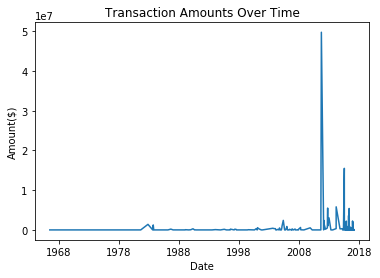

In [11]:
plt.plot(df['dates'],df['amounts'])
plt.title('Transaction Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Amount($)')